In [1]:
import matplotlib.transforms as mtransforms
import matplotlib
import matplotlib.pyplot as plt
import json 
import numpy as np

plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 

In [2]:
# Environmental Parameters
T_env = 293       # Ambient temperature (K)
R_env = 0.01      # Convection resistance to ambient (K/W)

# Heat Flows (in Watts)
# Positive values indicate heat generation; negative values indicate cooling.
Q_1 = 2000    
Q_2 = 4000    
Q_3 = -200    
Q_4 = -2000   

# Inter-node Thermal Resistances (in K/W)
# These values lump together conduction and convection effects.
R_12 = 0.005
R_13 = 0.006
R_14 = 0.006
R_23 = 0.007
R_24 = 0.007
R_34 = 0.008

R_dict = {
    (1, 2): R_12,
    (1, 3): R_13,
    (1, 4): R_14,
    (2, 3): R_23,
    (2, 4): R_24,
    (3, 4): R_34
}

Connections = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

print(1+2*3*R_env/np.min([R_12, R_13, R_14, R_23, R_24, R_34]))

13.0


In [3]:
OM_results = {
  '000000': [313, 333, 291, 273],
  '000001': [313, 333, 284.571, 279.429],
  '000010': [313, 310.778, 291, 295.222],
  '000011': [313, 310.134, 292.738, 294.128],
  '000100': [313, 317.444, 306.556, 273],
  '000101': [313, 312.329, 297.86, 286.811],
  '000110': [313, 305.432, 299.49, 292.078],
  '000111': [313, 305.432, 297.61, 293.958],
  '001000': [297.615, 333, 291, 288.385],
  '001001': [298.032, 333, 289.917, 289.051],
  '001010': [305.027, 313.731, 291, 300.243],
  '001011': [303.868, 312.64, 295.104, 298.388],
  '001100': [297.615, 317.444, 306.556, 288.385],
  '001101': [301.033, 314.154, 300.961, 293.853],
  '001110': [303.362, 308.037, 301.022, 297.579],
  '001111': [303.784, 307.923, 300.037, 298.255],
  '010000': [304.538, 333, 299.462, 273],
  '010001': [300.325, 333, 292.72, 283.955],
  '010010': [304.538, 310.778, 299.462, 295.222],
  '010011': [303.741, 311.546, 298.186, 296.527],
  '010100': [310.11, 318.515, 308.375, 273],
  '010101': [305.673, 314.34, 301.277, 288.71],
  '010110': [306.776, 307.115, 303.042, 293.067],
  '010111': [305.552, 307.445, 301.083, 295.92],
  '011000': [295.778, 333, 293.986, 287.236],
  '011001': [295.778, 333, 292.353, 288.869],
  '011010': [301.431, 312.648, 297.519, 298.401],
  '011011': [301.459, 312.549, 297.759, 298.233],
  '011100': [300.597, 315.65, 303.505, 290.248],
  '011101': [301.01, 314.164, 300.978, 293.848],
  '011110': [302.659, 308.227, 301.754, 297.359],
  '011111': [302.659, 308.227, 300.921, 298.192],
  '100000': [321, 325, 291, 273],
  '100001': [321, 325, 284.571, 279.429],
  '100010': [311.957, 311.435, 291, 295.609],
  '100011': [311.618, 310.926, 292.949, 294.507],
  '100100': [315.087, 316.13, 305.783, 273],
  '100101': [312.676, 312.515, 297.949, 286.86],
  '100110': [309.138, 307.207, 300.533, 293.122],
  '100111': [309.138, 307.207, 298.654, 295.001],
  '101000': [307.909, 316.273, 291, 294.818],
  '101001': [307.465, 315.977, 292.628, 293.93],
  '101010': [307.632, 311.013, 291, 300.355],
  '101011': [306.48, 309.887, 295.155, 298.479],
  '101100': [304.608, 310.29, 302.347, 292.755],
  '101101': [305.269, 309.743, 299.727, 295.261],
  '101110': [304.957, 306.879, 300.341, 297.824],
  '101111': [305.137, 306.893, 299.657, 298.313],
  '110000': [312.818, 319.545, 304.636, 273],
  '110001': [309.14, 317.093, 297.279, 286.488],
  '110010': [306.739, 308.527, 300.837, 293.898],
  '110011': [306.261, 308.922, 299.024, 295.793],
  '110100': [312.626, 315.89, 308.484, 273],
  '110101': [308.254, 311.62, 301.367, 288.759],
  '110110': [306.892, 307.031, 303.06, 293.018],
  '110111': [306.171, 306.974, 301.109, 295.746],
  '111000': [304.286, 313.857, 299.304, 292.554],
  '111001': [304.286, 313.857, 297.671, 294.187],
  '111010': [304.07, 308.673, 299.169, 298.089],
  '111011': [304.073, 308.741, 298.891, 298.295],
  '111100': [304.138, 310.316, 303.085, 292.461],
  '111101': [304.11, 309.647, 301.052, 295.191],
  '111110': [303.992, 306.803, 301.8, 297.405],
  '111111': [303.992, 306.803, 300.967, 298.238],

}


In [4]:
config_num = []
config_string = []
T_1 = []
T_2 = []
T_3 = []
T_4 = []
for i, (key, val) in enumerate(OM_results.items()):
    config_num.append(i)
    config_string.append(key)
    T_1.append(val[0] - T_env)
    T_2.append(val[1] - T_env)
    T_3.append(val[2] - T_env)
    T_4.append(val[3] - T_env)

In [5]:
def build_A(x):
    cons = []
    for i, x_ij in enumerate(x):
        if x_ij == 1:
            cons.append(Connections[i])
    A = np.zeros((4, 4))
    for i in range(4):
        for j in range(4):
            if i == j:
                A[i, j] = 1/R_env + np.sum([1/R_dict[con] if i+1 in con else 0 for con in cons])
            elif i < j:
                if (i+1, j+1) in cons:
                    A[i, j] = -1/R_dict[(i+1, j+1)]
            elif i > j:
                if (j+1, i+1) in cons:
                    A[i, j] = -1/R_dict[(j+1, i+1)]
    print(np.linalg.cond(A))
    return A

B = [Q_1, Q_2, Q_3, Q_4]

In [6]:
T_1_LS = []
T_2_LS = []
T_3_LS = []
T_4_LS = []
for config in config_string:
    x = [int(c) for c in config]
    A = build_A(x) # type: ignore
    T = np.linalg.solve(A, B)
    T_1_LS.append(T[0])
    T_2_LS.append(T[1])
    T_3_LS.append(T[2])
    T_4_LS.append(T[3])

1.0
3.5
3.857142857142857
5.02675614915549
3.857142857142857
5.02675614915549
5.285714285714288
5.2857142857142865
4.333333333333335
5.418979698109996
5.656532981976667
6.820503767027208
4.333333333333335
5.816305107630795
6.106824047151484
6.82833234664152
4.333333333333335
5.41897969811
4.333333333333335
5.816305107630792
5.656532981976667
6.820503767027207
6.106824047151483
6.82833234664152
6.000000000000001
6.0
6.508441522055888
6.899112476476813
6.508441522055889
6.89911247647681
7.226682701863102
7.226682701863102
5.0
5.0
6.2128565709709695
6.443353574468396
6.2128565709709695
6.4433535744683965
7.537579230605746
7.537579230605744
6.52258812094334
6.807446957091863
6.59239554804336
6.917767845782214
7.091736645486029
7.533061945536993
7.6333187067942925
7.69748125955315
6.522588120943342
6.807446957091863
7.09173664548603
7.53306194553699
6.59239554804336
6.917767845782213
7.633318706794292
7.6974812595531565
8.129955639676588
8.129955639676588
8.146466112767865
8.151495527554953

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_57705/247942114.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


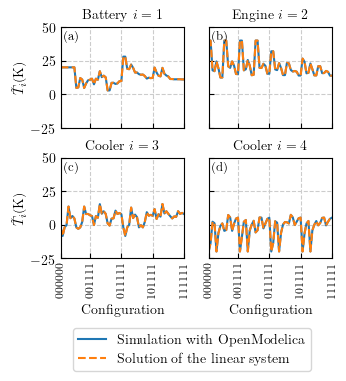

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(3.5, 3), sharex=True,  gridspec_kw={'wspace': 0.2, 'hspace': 0.3}, sharey=True)

# TOP LEFT (0, 0)
ax[0, 0].plot(T_1, marker='', ls='-', label="Simulation with OpenModelica")
ax[0, 0].plot(T_1_LS, marker='', ls='--', label="Solution of the linear system")
ax[0, 0].set_title(r"Battery $i=1$", fontsize=10)
ax[0, 0].set_ylabel(r"$\tilde{T}_i (\mathrm{K})$")
ax[0, 0].xaxis.grid(True, which="both", ls="--", c='0.8')
ax[0, 0].yaxis.grid(True, which="both", ls="--", c='0.8')
ax[0, 0].tick_params(which='both', direction="in")
# ax[0, 0].set_ylim([4.75, 5.5])

# TOP RIGHT (0, 1)
ax[0, 1].plot(T_2, marker='', ls='-')
ax[0, 1].plot(T_2_LS, marker='', ls='--')
ax[0, 1].set_title(r"Engine $i=2$", fontsize=10)
ax[0, 1].xaxis.grid(True, which="both", ls="--", c='0.8')
ax[0, 1].yaxis.grid(True, which="both", ls="--", c='0.8')
ax[0, 1].tick_params(which='both', direction="in")
# ax[0, 1].set_ylim([49, 50.1])

# BOTTOM LEFT (1, 0)
ax[1, 0].plot(T_3, marker='', ls='-')
ax[1, 0].plot(T_3_LS, marker='', ls='--')
ax[1, 0].set_title(r"Cooler $i=3$", fontsize=10)
ax[1, 0].set_xlabel(r"Configuration")
ax[1, 0].set_ylabel(r"$\tilde{T}_i (\mathrm{K})$")
ax[1, 0].xaxis.grid(True, which="both", ls="--", c='0.8')
ax[1, 0].yaxis.grid(True, which="both", ls="--", c='0.8')
ax[1, 0].tick_params(which='both', direction="in")
# ax[1, 0].set_ylim([-4.05, -3.6])

# BOTTOM RIGHT (1, 1)
ax[1, 1].plot(T_4, marker='', ls='-')
ax[1, 1].plot(T_4_LS, marker='', ls='--')
ax[1, 1].set_title(r"Cooler $i=4$", fontsize=10)
ax[1, 1].set_xlabel(r"Configuration")
ax[1, 1].xaxis.grid(True, which="both", ls="--", c='0.8')
ax[1, 1].yaxis.grid(True, which="both", ls="--", c='0.8')
ax[1, 1].tick_params(which='both', direction="in")
# ax[1, 1].set_ylim([-3.05, -2.7])

# GENERAL SETTINGS
# ax[0, 0].set_xscale('log')
# ax[0, 0].set_yscale('log', base=4)
# ax[0, 0].set_ylim([4**0, max_y])
# y_ticks = [4**n for n in range(int(np.emath.logn(4, max_y))+1)]
# ax[0, 0].set_yticks(y_ticks)
ax[0, 0].set_xlim([0, 63])
ax[0, 0].set_ylim([-25, 50])
ax[1, 0].set_xticks([0, 15, 31, 47, 63], ["000000", "001111", "011111", "101111", "111111"], rotation=90, fontsize=8)
ax[1, 1].set_xticks([0, 15, 31, 47, 63], ["000000", "001111", "011111", "101111", "111111"], rotation=90, fontsize=8)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0, 0].text(0.25, 0.75, "(a)", transform=ax[0, 0].transAxes + trans, fontsize=9, va='bottom')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0, 1].text(0.25, 0.75, "(b)", transform=ax[0, 1].transAxes + trans, fontsize=9, va='bottom')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1, 0].text(0.25, 0.75, "(c)", transform=ax[1, 0].transAxes + trans, fontsize=9, va='bottom')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1, 1].text(0.25, 0.75, "(d)", transform=ax[1, 1].transAxes + trans, fontsize=9, va='bottom')

# ax[1, 1].set_yticks([-3, -2.9, -2.8, -2.7])
# ax[0, 0].set_yticks([4.75, 5.25], ["", ""], minor=True)
# ax[0, 0].set_xticks([1e4, 1e6, 1e8], minor=True, labels=[""]*3)
fig.legend(*ax[0, 0].get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.5, -0.1))
fig.tight_layout()

plt.savefig(f"OM_results.pdf", bbox_inches="tight")